In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data=pd.read_csv(r"C:\Users\Shahed\OneDrive - Hashemite University\Classification_Example-1\classification data.txt"
                ,header=None
                ,names=['exam1','exam2','admitted'])

In [3]:
data.head(10)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [4]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
positive=data[data['admitted'].isin([1])]
negative=data[data['admitted'].isin([0])]

In [6]:
positive

,exam1,exam2,admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


In [7]:
negative

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


Text(0, 0.5, 'exam 2 score')

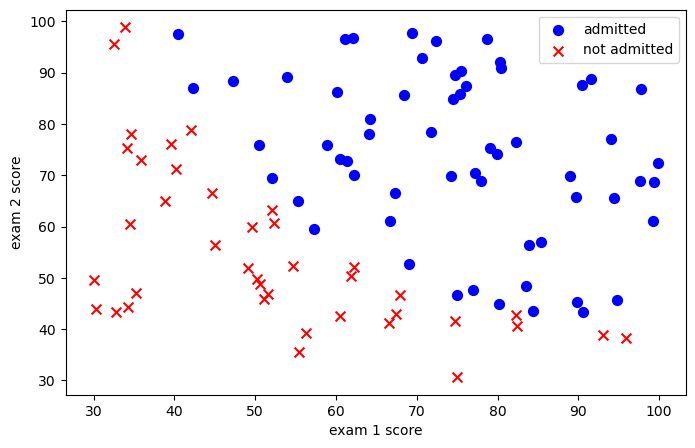

In [8]:
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(positive['exam1'],positive['exam2']
          ,s=50,c='b',marker='o'
          ,label='admitted')
ax.scatter(negative['exam1'],negative['exam2']
          ,s=50,c='r',marker='x'
          ,label='not admitted')
ax.legend()
ax.set_xlabel('exam 1 score')
ax.set_ylabel('exam 2 score')

In [9]:
def sigmoid(num):
    return 1/(1+np.exp(-num))

In [10]:
numbers=np.arange(-10,10)

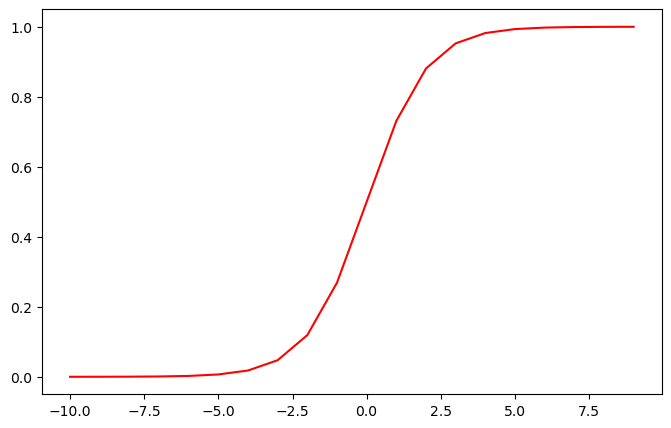

In [11]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(numbers,sigmoid(numbers)
       ,c='r')

In [12]:
data.insert(0,'ones',1)
data.head()

,ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [13]:
cols=data.shape[1]
x=data.iloc[:,:cols-1]
y=data.iloc[:,cols-1:]

In [14]:
x.head()

,ones,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [15]:
y.head()

,admitted
0,0
1,0
2,0
3,1
4,1


In [16]:
x=np.array(x.values)
y=np.array(y.values)
theta=np.zeros(3)

In [17]:
def cost(theta,x,y):
    x=np.matrix(x)
    y=np.matrix(y)
    theta=np.matrix(theta)
    first=np.multiply(-y,np.log(sigmoid(x*theta.T)))
    second=np.multiply(1-y,np.log(1-sigmoid(x*theta.T)))
    return np.sum(first-second)/len(x)

In [18]:
cost(theta,x,y)

0.6931471805599453

In [19]:
def gradient(theta,x,y):
    x=np.matrix(x)
    y=np.matrix(y)
    theta=np.matrix(theta)
    
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)

    error=sigmoid(x*theta.T)-y

    for i in range(parameters):
        term=np.multiply(error,x[:, i])
        grad[i]=np.sum(term)/len(x)

    return grad

In [20]:
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))
result

(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

In [21]:
optimized_cost=cost(result[0],x,y)
optimized_cost

0.20349770158947486

In [22]:
def predect(theta,x):
    probapility=sigmoid(x*theta.T)
    return [1 if i>=0.5 else 0 for i in probapility]

In [23]:
theta_min=np.matrix(result[0])
predection=predect(theta_min,x)
predection

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [24]:
corrict=[1 if ((new_y==1 and y==1)or(new_y==0 and y==0)) else 0
        for new_y,y in zip(predection,y)]

In [25]:
accuracy=(sum(corrict)%len(corrict))
accuracy

89